In [1]:
#from google.colab import drive
#drive.mount("/content/drive")
dataset_directory = '/kaggle/input/har-dataset/HARDATA_SHREYA'

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (299, 299)  # InceptionV3 expects 299x299 images
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_directory,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_directory,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

2024-07-26 16:01:59.743031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 16:01:59.743130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 16:01:59.912449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 4359 images belonging to 25 classes.
Found 1078 images belonging to 25 classes.


In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

num_classes = 25

local_weights_path = '/kaggle/input/inceptionv3-weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = InceptionV3(weights=local_weights_path, include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add Dropout layer
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('inceptionv3_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/137 ━━━━━━━━━━━━━━━━━━━━ 1:29:31 39s/step - accuracy: 0.0312 - loss: 3.8662

I0000 00:00:1722009919.299618     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722009919.352821     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 17/137 ━━━━━━━━━━━━━━━━━━━━ 3:45 2s/step - accuracy: 0.0413 - loss: 3.8596

W0000 00:00:1722009949.319149     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1439 - loss: 3.1510

W0000 00:00:1722010068.145384     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.73450, saving model to inceptionv3_model.keras


W0000 00:00:1722010094.524888     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.1446 - loss: 3.1478 - val_accuracy: 0.5204 - val_loss: 1.7345 - learning_rate: 0.0010
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.3805 - loss: 2.0947
Epoch 2: val_loss improved from 1.73450 to 1.41747, saving model to inceptionv3_model.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 113s 784ms/step - accuracy: 0.3807 - loss: 2.0940 - val_accuracy: 0.5779 - val_loss: 1.4175 - learning_rate: 0.0010
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 753ms/step - accuracy: 0.4519 - loss: 1.8433
Epoch 3: val_loss improved from 1.41747 to 1.32100, saving model to inceptionv3_model.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 114s 793ms/step - accuracy: 0.4518 - loss: 1.8433 - val_accuracy: 0.5974 - val_loss: 1.3210 - learning_rate: 0.0010
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.4575 - loss: 1.7534
Epoch 4: val_loss improved from 1.32100 to 1.26256, saving model to inceptionv3_model.keras
137/137 ━━━━━━━━━━━━━━━━━━━━

In [8]:
base_model.trainable = True

# Freeze all layers except the last few
for layer in base_model.layers[:-50]:
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/30
  1/137 ━━━━━━━━━━━━━━━━━━━━ 1:12:09 32s/step - accuracy: 0.5312 - loss: 1.4436

W0000 00:00:1722013419.739923     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 52/137 ━━━━━━━━━━━━━━━━━━━━ 1:23 979ms/step - accuracy: 0.5033 - loss: 1.6635

W0000 00:00:1722013469.635490     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 856ms/step - accuracy: 0.5192 - loss: 1.5816

W0000 00:00:1722013542.167779     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss did not improve from 0.96695
137/137 ━━━━━━━━━━━━━━━━━━━━ 161s 953ms/step - accuracy: 0.5194 - loss: 1.5809 - val_accuracy: 0.6781 - val_loss: 0.9967 - learning_rate: 1.0000e-05
Epoch 2/30


W0000 00:00:1722013549.382130     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.5934 - loss: 1.2863
Epoch 2: val_loss did not improve from 0.96695
137/137 ━━━━━━━━━━━━━━━━━━━━ 114s 788ms/step - accuracy: 0.5935 - loss: 1.2860 - val_accuracy: 0.6800 - val_loss: 0.9883 - learning_rate: 1.0000e-05
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.6223 - loss: 1.2236
Epoch 3: val_loss improved from 0.96695 to 0.96068, saving model to inceptionv3_model.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 116s 805ms/step - accuracy: 0.6223 - loss: 1.2234 - val_accuracy: 0.6939 - val_loss: 0.9607 - learning_rate: 1.0000e-05
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.6116 - loss: 1.1853
Epoch 4: val_loss improved from 0.96068 to 0.93959, saving model to inceptionv3_model.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 114s 789ms/step - accuracy: 0.6117 - loss: 1.1852 - val_accuracy: 0.7032 - val_loss: 0.9396 - learning_rate: 1.0000e-05
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.6

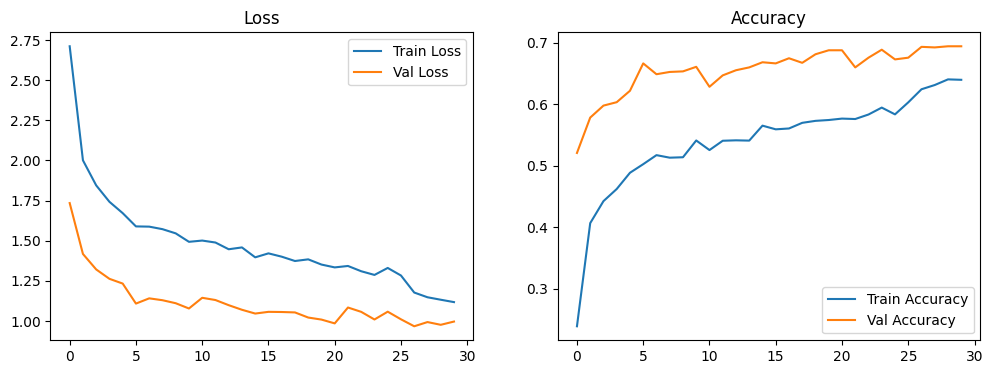

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.7672 - loss: 0.8019
Test Loss: 0.8353, Test Accuracy: 0.7570


In [9]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# Evaluate model
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Found 1078 images belonging to 25 classes.
 1/34 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step


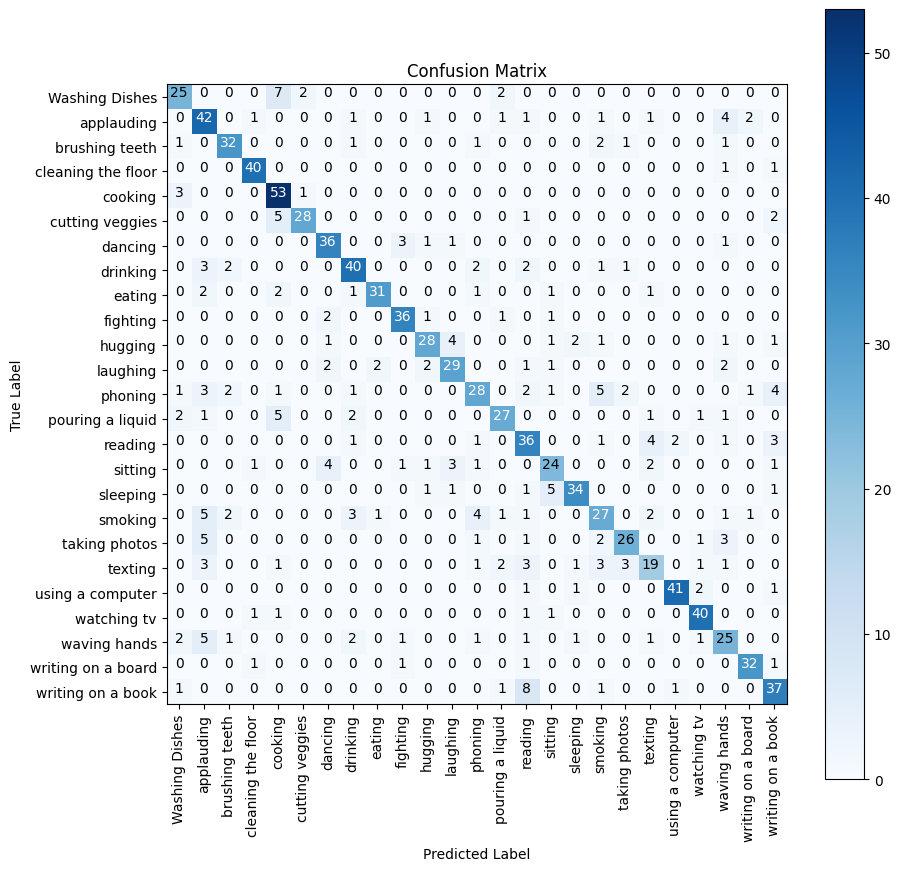

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Ensure validation generator does not shuffle the data
validation_generator = validation_datagen.flow_from_directory(
    dataset_directory,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Get true labels
true_labels = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Get predictions
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

# Labeling the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding values in the plot
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, f"{conf_matrix[i, j]}", horizontalalignment="center",
             color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()
